In [196]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  
from sklearn import metrics
import os
import math

In [197]:
def sigma_each(x):
    std = np.std(x, axis=0 , ddof= 1)
    std = np.array(std)
    aa = Math.pow(std,2)
    return aa

In [198]:
def AI(arr):
    trisum = 0
    result = []
    for i in range(len(arr)):
        for j in range(3):
            trisum += arr[i][j]
        
        result.append(Math.sqrt(Math.max(trisum/3,0)))
    result = np.array(result)
    return result

In [199]:
INPUT_SIGNAL_TYPES = [
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

# Output classes to learn how to classify
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

In [200]:
def load_X(X_signals_paths):
    X_signals = []

    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()

    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
      "UCI HAR Dataset/train/" + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES
]
X_test_signals_paths = [
    "UCI HAR Dataset/test/" + "Inertial Signals/" + signal + "test.txt" for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)


# Load "y" (the neural network's training and testing outputs)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()

    # Substract 1 to each output class for friendly 0-based indexing
    return y_ - 1

y_train_path = "UCI HAR Dataset/train/y_train.txt"
y_test_path = "UCI HAR Dataset/test/y_test.txt"

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)

In [201]:
print(y_train)
print("-------------")
print(y_test)

[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
-------------
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]


In [202]:
print(X_train)
print("-------------")
print("-----------------------------------------------------------")
print(X_train[0])
print("-----------------------------------------------------------")
print(X_train[0][0])
print("-----------------------------------------------------------")
print(X_train[0][0][0])
print("-----------------------------------------------------------")
print(len(X_train),len(y_train))
print("-----------------------------------------------------------")

print(len(X_train[0]))
print(len(X_train[0][0]))

[[[ 1.012817   -0.1232167   0.1029341 ]
  [ 1.022833   -0.1268756   0.1056872 ]
  [ 1.022028   -0.1240037   0.1021025 ]
  ...
  [ 1.018445   -0.1240696   0.1003852 ]
  [ 1.019372   -0.1227451   0.09987355]
  [ 1.021171   -0.121326    0.09498741]]

 [[ 1.018851   -0.123976    0.09792958]
  [ 1.02238    -0.1268078   0.09935086]
  [ 1.020781   -0.1277862   0.09811381]
  ...
  [ 1.014788   -0.1290268   0.0935352 ]
  [ 1.016499   -0.1264244   0.08903516]
  [ 1.017849   -0.1305193   0.09061235]]

 [[ 1.023127   -0.1200157   0.09111667]
  [ 1.021882   -0.1214994   0.0926756 ]
  [ 1.019178   -0.1228407   0.09606378]
  ...
  [ 1.021041   -0.1308757   0.08301135]
  [ 1.022935   -0.1312099   0.08233391]
  [ 1.022019   -0.1301826   0.08148748]]

 ...

 [[ 0.7548917  -0.1711829   0.1745865 ]
  [ 0.8043137  -0.1999375   0.2324243 ]
  [ 0.831714   -0.2319457   0.2576066 ]
  ...
  [ 0.6956257  -0.2217656   0.1112952 ]
  [ 0.7479103  -0.2811496   0.1263023 ]
  [ 0.776768   -0.3275988   0.1886212 ]]

 [

In [203]:
# import more_itertools as mit

# all_windows = []

# for X_i in X_train:
#     window_i = list(mit.windowed(X_i,n=64))
#     window_i = np.array(window_i)
#     all_windows.append(window_i)

# print(len(all_windows))
# print("----------------")
# print(len(all_windows[0]))

# print(list(mit.windowed(X_train, n=64)))

In [204]:
def equation_bi(X_train):
    all_std = []
    
    for X_i in X_train:
        std_i = np.std(X_i,axis=0)
        all_std.append(std_i)
        
    all_std = np.array(all_std)
    ai = np.sum(all_std**2,axis=1)/3
    ai[ai<0] = 0
    ai = np.sqrt(ai)
    
    return ai

In [205]:
ai = equation_bi(X_train)

In [206]:
ai_y = []
for i in range(len(all_y)):
    ai_y.append([ai[i],y_train[i][0]])

ai_y = np.array(ai_y)

# print(ai_y.shape)
# print(ai_y)

In [207]:
import pandas as pd

df = pd.DataFrame(ai_y).groupby(1,as_index=True)

idx = {}
df_key = {}
for key,item in df:
    idx[key] = df.get_group(key).index
    df_key[key] = df.get_group(key)

# print(df_key[0].values)
    
# print(idx)

In [208]:
import matplotlib.pyplot as plt
import matplotlib

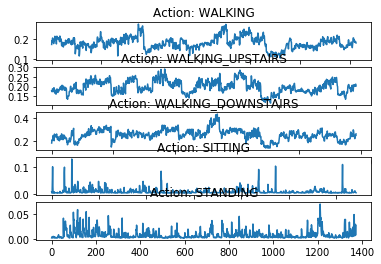

In [209]:
keys = 5
ai_lb = {}
for i in range(keys):
    ai_lb[i] = df_key[i][0].values
# print(ai_lb)
    
for i in range(keys):
    plt.subplot(keys,1,i+1)
    plt.plot(ai_lb[i])
    plt.title('Action: ' + LABELS[i])
    
plt.show()